<a href="https://colab.research.google.com/github/jcjcchang/2nd-ML100Days/blob/master/homework/Day_007_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
#dir_data = './data/'
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [2]:
app_train = pd.read_csv('gdrive/My Drive/draft-ds/application_train.csv')
#f_app = os.path.join(dir_data, 'application_train.csv')
#print('Path of read in data: %s' % (f_app))
#app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [3]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [4]:
"""
YOUR CODE HERE
"""

# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_100 = [i for i in range(101)]

#print(q_100)

quantile_100s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in q_100]

print(quantile_100s)
print(len(quantile_100s))
print(len(q_100))
q0_q100=pd.DataFrame({'q': list(range(101)),
              'value': quantile_100s})
print(q0_q100.head())

[1615.5, 6182.910000000001, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9553.5, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17109.0, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21865.5, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24583.589999999953, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29830.5, 30078.0, 30483.0, 30897.0, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35345.16000000005, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40135.5, 40806.0, 41845.5, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58482.0, 62964.0, 70006.5, 258025.5]
101
101
   q    value
0  0  1615.50
1  1  6182.91
2  2  6750.00
3

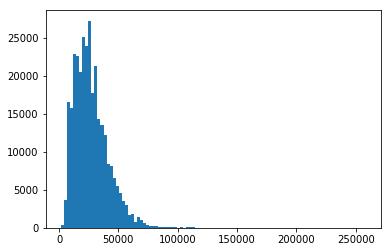

In [5]:
plt.hist(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],bins=100)
plt.show()

In [0]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


# 試著將 max 取代為 q99


"""
Your Code Here
"""
q_50 = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [9]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())


def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    x = 2*((x-min(x))/(max(x)-min(x))-0.5)
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

== Original data range ==
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307499.000000
mean         -0.801154
std           0.113051
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [0]:
from scipy.stats import mode
import time



In [19]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
start_time = time.time()
#mode_get = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_ANNUITY'])
#print(mode_get)


#print(app_train['AMT_GOODS_PRICE'].value_counts)
value_most = mode(app_train['AMT_GOODS_PRICE'])
print(value_most)




mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
ModeResult(mode=array([450000.]), count=array([26300]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
